In [1]:
import pickle
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import sys
sys.path.append('../../basic/')
from modules.Utils import running_mean as rm
#from modules.Utils.gridworld_plotting import plot_polmap, plot_pref_pol

In [2]:
id_data = pd.read_csv('../Data/scinetJan10_2021.csv')
print(id_data)
novel_R = {'MF':[], 'EC':[], 'bootstrap':[]}
moved_R = {'MF':[], 'EC':[], 'bootstrap':[]}

                                  run_id                env_type  expt_type  \
0   1e33d371-bfe0-4b60-90f3-7e3b538af794  gym_grid:gridworld-v11  bootstrap   
1   140d5f1a-bb4f-4f0a-95e1-e873df60eed3  gym_grid:gridworld-v11  bootstrap   
2   916f3f34-3039-468d-b351-e94811179da7  gym_grid:gridworld-v11  bootstrap   
3   c6613922-04fa-4ac2-9dd5-62a6e85d546c  gym_grid:gridworld-v11  bootstrap   
4   b0e4fea0-856b-4e02-bbba-6fe5c56f6b25  gym_grid:gridworld-v11         MF   
5   41b76eba-8d03-4ab8-8d50-8569002b9922  gym_grid:gridworld-v11         MF   
6   b8e0630d-c383-44e9-b6f9-24e61012c52d  gym_grid:gridworld-v11         MF   
7   e4b0e429-00a8-4781-b907-5b0390726795  gym_grid:gridworld-v11         MF   
8   283494b1-89e3-4d54-bbf8-eff58e95dd95  gym_grid:gridworld-v11         MF   
9   97b75c21-1d05-4abc-bb31-f5c8a67ca297  gym_grid:gridworld-v11         MF   
10  37470ef7-34df-4e05-8b9b-13542e40fd35  gym_grid:gridworld-v11         MF   
11  795f3a9b-83c2-4156-bdad-9cc73e3ddd62   gym_grid:

In [3]:
for i in range(len(id_data['run_id'])):
    run_id = id_data.iloc[[i]]['run_id'].item()
    env_type = id_data.iloc[[i]]['env_type'].item()
    expt_type = id_data.iloc[[i]]['expt_type'].item()
    print(run_id[0:8], env_type[19:], expt_type)
    with open(f'../Data/results/{run_id}_data.p', 'rb') as f:
        data = pickle.load(f)

    if env_type == 'gym_grid:gridworld-v1': #reward at 5,5
        novel_R[expt_type].append(data)
    elif env_type == 'gym_grid:gridworld-v11': # reward at 10,10, MF trained on 5,5
        moved_R[expt_type].append(data)
    else:
        raise Exception('Env Type Error')

1e33d371 v11 bootstrap
140d5f1a v11 bootstrap
916f3f34 v11 bootstrap
c6613922 v11 bootstrap
b0e4fea0 v11 MF
41b76eba v11 MF
b8e0630d v11 MF
e4b0e429 v11 MF
283494b1 v11 MF
97b75c21 v11 MF
37470ef7 v11 MF
795f3a9b v1 bootstrap
dd0eee26 v1 EC
9095c14d v1 EC
dc4b882c v1 EC
45467506 v1 EC
7bfbb5a4 v1 EC
12cc334a v1 EC
bc966e43 v1 MF
17375bb3 v1 MF
357d939b v1 MF
3d805bfc v1 MF
97b5f281 v1 MF
7b9f7800 v1 bootstrap
cf48d39a v1 bootstrap
7f623658 v1 bootstrap
22e8c3b3 v1 bootstrap
cd2eddf9 v11 bootstrap
520823c5 v11 bootstrap
97e837dc v11 bootstrap
cd103164 v11 bootstrap
656d14b8 v11 bootstrap
29ffa4cf v1 bootstrap


In [4]:
print("MF_0", len(novel_R['MF']))
print("EC_0", len(novel_R['EC']))
print("b_0", len(novel_R['bootstrap']))
print("MF_1", len(moved_R['MF']))
print("EC_1", len(moved_R['EC']))
print("b_1", len(moved_R['bootstrap']))

MF_0 5
EC_0 6
b_0 6
MF_1 7
EC_1 0
b_1 9


In [5]:
mf_0_raw = []
mf_1_raw = []
mf_01_raw = []
mf_11_raw = []

ec_0_raw = []
ec_1_raw = []

for dat in novel_R['MF']:
    mf_0_raw.append(dat['total_reward'])
    
for dat in novel_R['EC']:
    ec_0_raw.append(dat['total_reward'])
    
for dat in novel_R['bootstrap']:
    ec_dat = dat['total_reward']
    mf_dat = dat['bootstrap_reward']
    
    ec_0_raw.append(ec_dat)
    mf_01_raw.append(mf_dat)
    
# moved reward
for dat in moved_R['MF']:
    mf_1_raw.append(dat['total_reward'])
    
for dat in moved_R['EC']:
    ec_1_raw.append(dat['total_reward'])
    
for dat in moved_R['bootstrap']:
    ec_dat = dat['total_reward']
    mf_dat = dat['bootstrap_reward']
    
    ec_1_raw.append(ec_dat)
    mf_11_raw.append(mf_dat)

In [6]:
def mean_std(raw_data, smoothing=50):
    dat_avg = rm(np.mean(raw_data, axis=0), smoothing)
    dat_std = rm(np.std(raw_data, axis=0), smoothing)
    
    return dat_avg, dat_std

def plot_fill(avg, std, label=''):
    plt.plot(avg, label=label)
    plt.fill_between(np.arange(len(avg)), avg-std, avg+std, alpha=0.2)

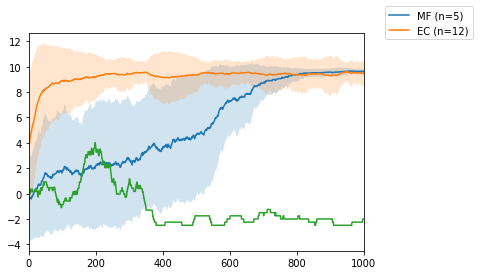

In [39]:
mf_0_avg, mf_0_std = mean_std(mf_0_raw)
ec_0_avg, ec_0_std = mean_std(ec_0_raw)
mf_01_avg, mf_01_std = mean_std(mf_01_raw)

# plot
plt.figure(0)
plot_fill(mf_0_avg, mf_0_std, label=f'MF (n={len(mf_0_raw)})')
plot_fill(ec_0_avg, ec_0_std, label=f'EC (n={len(ec_0_raw)})')
#plot_fill(mf_01_avg, mf_01_std, label=f'ECMF (n={len(mf_01_raw)})')
plt.plot(rm(mf_01_raw[5],50))
plt.legend(bbox_to_anchor=(1.05,0.95))
plt.xlim([0,1000])
plt.show()
plt.close()

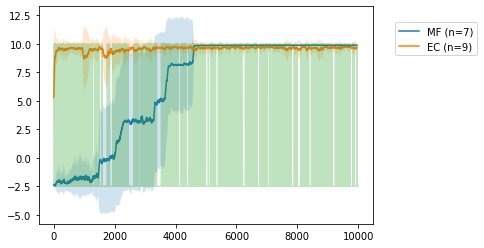

In [38]:
mf_1_avg, mf_1_std = mean_std(mf_1_raw)
ec_1_avg, ec_1_std = mean_std(ec_1_raw)
mf_11_avg, mf_11_std = mean_std(mf_11_raw)

# plot
plot_fill(mf_1_avg, mf_1_std, label=f'MF (n={len(mf_1_raw)})')
plot_fill(ec_1_avg, ec_1_std, label=f'EC (n={len(ec_1_raw)})')
#plot_fill(mf_11_avg, mf_11_std, label=f'MF (n={len(mf_11_raw)})')
plt.plot(rm(mf_11_raw[0],1), alpha =0.3)
plt.legend(bbox_to_anchor=(1.05,0.95))
plt.show()